In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
original_df = pd.read_csv('vgsales.csv')

In [3]:
original_df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [4]:
original_df.describe(include='object')

Name Platform   Genre        Publisher
count                         16598    16598   16598            16540
unique                        11493       31      12              578
top     Need for Speed: Most Wanted       DS  Action  Electronic Arts
freq                             12     2163    3316             1351

In [5]:
# list of columns we want to convert in categorical columns
categorical_columns = ['Platform','Genre','Publisher']

In [6]:
# converting into categorical columns
original_df[categorical_columns] = original_df[categorical_columns].astype('category')

In [7]:
original_df.dtypes

Rank               int64
Name              object
Platform        category
Year             float64
Genre           category
Publisher       category
NA_Sales         float64
EU_Sales         float64
JP_Sales         float64
Other_Sales      float64
Global_Sales     float64
dtype: object

In [8]:
original_df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [9]:
original_df.tail()

Rank                                              Name Platform  \
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year     Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
16593  2002.0  Platform       Kemco      0.01      0.00       0.0   
16594  2003.0   Shooter  Infogrames      0.01      0.00       0.0   
16595  2008.0    Racing  Activision      0.00      0.00       0.0   
16596  2010.0    Puzzle    7G//AMES      0.00      0.01       0.0   
16597  2003.0  Platform     Wanadoo      0.01      0.00       0.0   

       Other_Sales  Global_Sales  
16593          0.0          0.01  
16594          0.0          0.01  
16595          0.0          0.01  
16596          0.0          0.01  
16597          0.0          0.01

In [10]:
#check for null values
original_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
#droping null values
original_df = original_df.dropna()

In [12]:
#now let check for zeroes
zeroes_bool_df = (original_df == 0)
zeroes_bool_df.shape

(16291, 11)

In [13]:
#lets check the statistics of the original dataframe
original_df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228   2006.405561      0.265647      0.147731      0.078833   
std     4792.654450      5.832412      0.822432      0.509303      0.311879   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4132.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12439.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16291.000000  16291.000000  
mean       0.048426      0.540910  
std        0.190083      1.567345  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  
max       10.570000     82.740000

In [14]:
original_df['Platform'].unique().tolist()

['Wii',
 'NES',
 'GB',
 'DS',
 'X360',
 'PS3',
 'PS2',
 'SNES',
 'GBA',
 '3DS',
 'PS4',
 'N64',
 'PS',
 'XB',
 'PC',
 '2600',
 'PSP',
 'XOne',
 'GC',
 'WiiU',
 'GEN',
 'DC',
 'PSV',
 'SAT',
 'SCD',
 'WS',
 'NG',
 'TG16',
 '3DO',
 'GG',
 'PCFX']

<Axes: xlabel='Platform'>

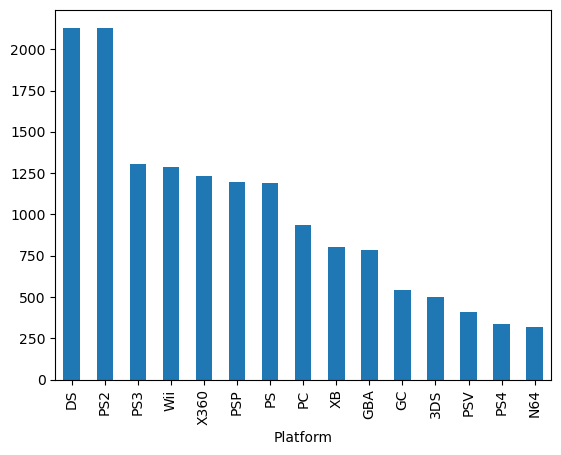

In [15]:
original_df['Platform'].value_counts()[:15].plot(kind='bar')

<Axes: xlabel='Publisher'>

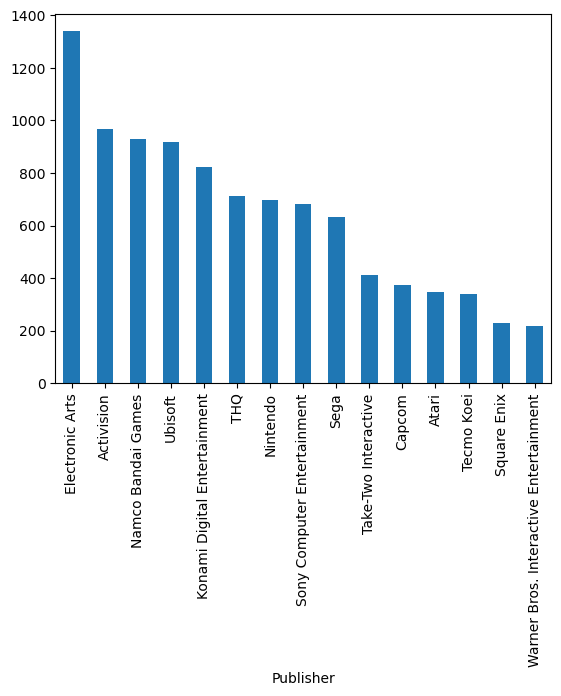

In [16]:
original_df['Publisher'].value_counts()[:15].plot(kind='bar')

<Axes: xlabel='Genre'>

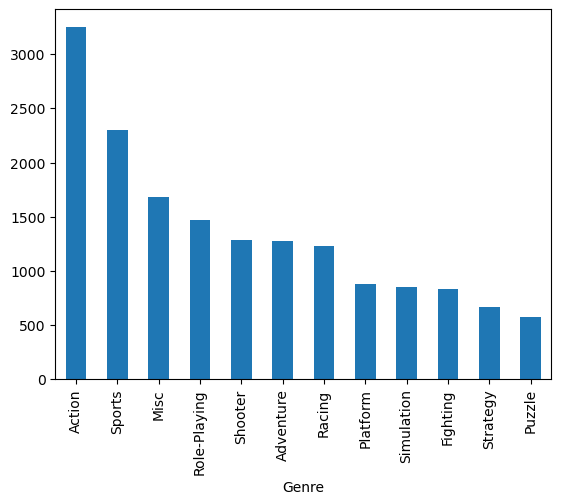

In [17]:
original_df['Genre'].value_counts().plot(kind='bar')

In [18]:
original_df.corr(numeric_only=True)

Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178027 -0.400315 -0.379137 -0.269323    -0.332735   
Year          0.178027  1.000000 -0.091285  0.006108 -0.169387     0.041128   
NA_Sales     -0.400315 -0.091285  1.000000  0.768923  0.451283     0.634518   
EU_Sales     -0.379137  0.006108  0.768923  1.000000  0.436379     0.726256   
JP_Sales     -0.269323 -0.169387  0.451283  0.436379  1.000000     0.290559   
Other_Sales  -0.332735  0.041128  0.634518  0.726256  0.290559     1.000000   
Global_Sales -0.426975 -0.074647  0.941269  0.903264  0.612774     0.747964   

              Global_Sales  
Rank             -0.426975  
Year             -0.074647  
NA_Sales          0.941269  
EU_Sales          0.903264  
JP_Sales          0.612774  
Other_Sales       0.747964  
Global_Sales      1.000000

## correlation between numeric values

<Axes: >

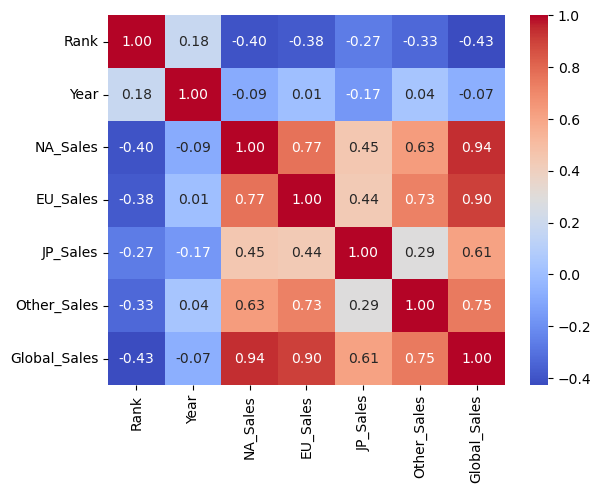

In [19]:
corr_matrix = original_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [20]:
pearson_corr = original_df['NA_Sales'].corr(original_df['Global_Sales'], method='pearson')

In [21]:
pearson_corr

0.9412692156419187

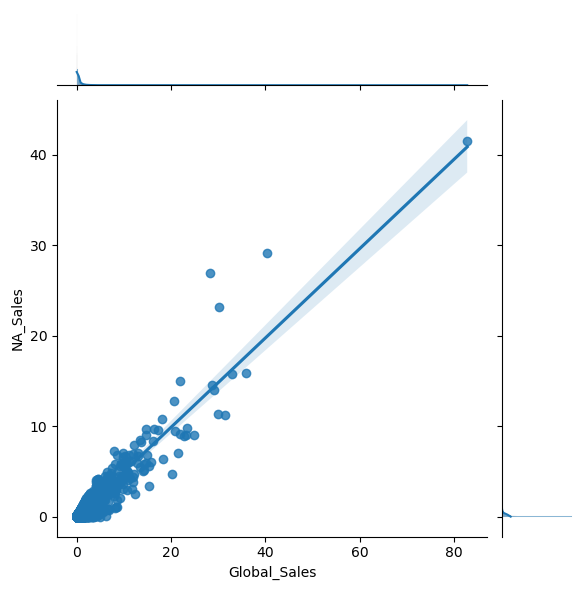

In [22]:
sns.jointplot(data=pearson_corr, y=original_df['NA_Sales'], x=original_df['Global_Sales'], kind='reg')

# Top selling games

In [23]:
top_games = original_df.loc[original_df['Rank'] < 11]
top_games

Rank                       Name Platform    Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989.0        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                   Wii Play      Wii  2006.0          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
5     23.20      2.26      4.22         0.58         30.26  
6     11.38      9.23      6.50         2.90         30.01  
7     14.03      9.20      2.93         2.85         29.02  
8     14.59      7.06      4.70         2.26         28.62  
9     26.93      0.63      0.28         0.47         28.31

Text(0, 0.5, 'Game')

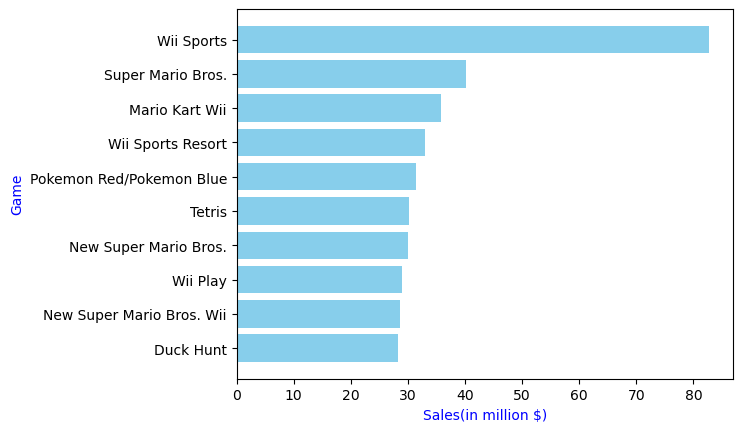

In [24]:
plt.barh(top_games['Name'], top_games['Global_Sales'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Sales(in million $)", color='blue')
plt.ylabel("Game", color='blue')

# Platform Sales

In [25]:
platform_sales = original_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
platform_sales

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
GB       254.42
XB       252.09
NES      251.07
3DS      246.27
N64      218.21
SNES     200.05
GC       197.14
XOne     141.06
2600      86.57
WiiU      81.86
PSV       61.60
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

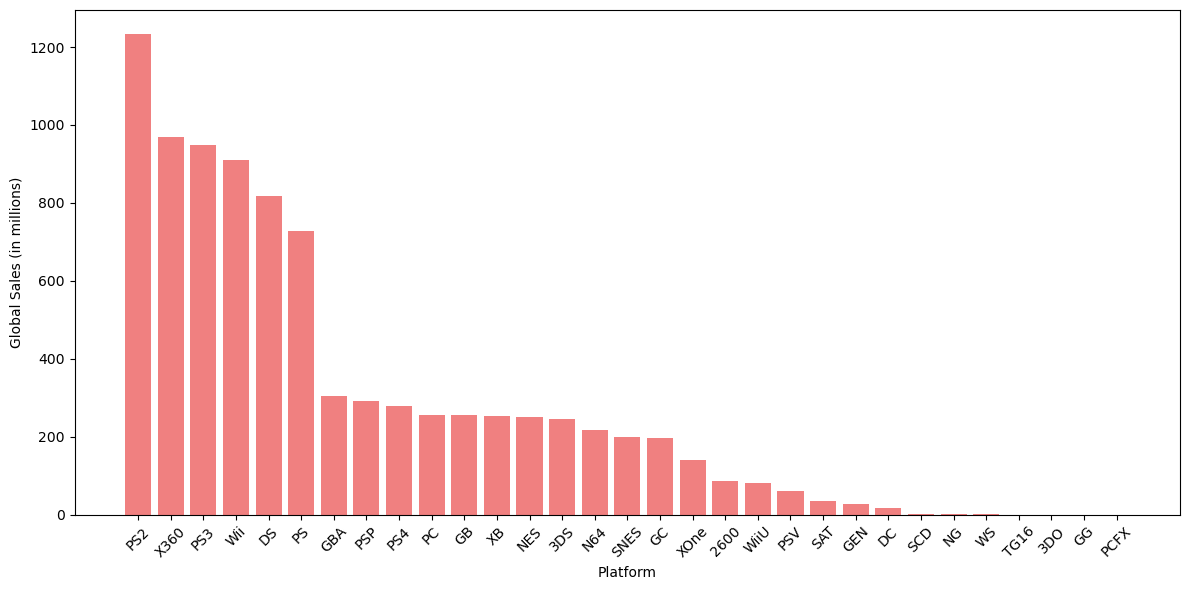

In [26]:
plt.figure(figsize=(12, 6))
plt.bar(platform_sales.index, platform_sales.values, color='lightcoral')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()

# Genre Sales

In [27]:
genre_sales = original_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genre_sales

Genre
Action          1722.84
Sports          1309.24
Shooter         1026.20
Role-Playing     923.83
Platform         829.13
Misc             789.87
Racing           726.76
Fighting         444.05
Simulation       389.98
Puzzle           242.21
Adventure        234.59
Strategy         173.27
Name: Global_Sales, dtype: float64

Text(0, 0.5, 'Global_Sales')

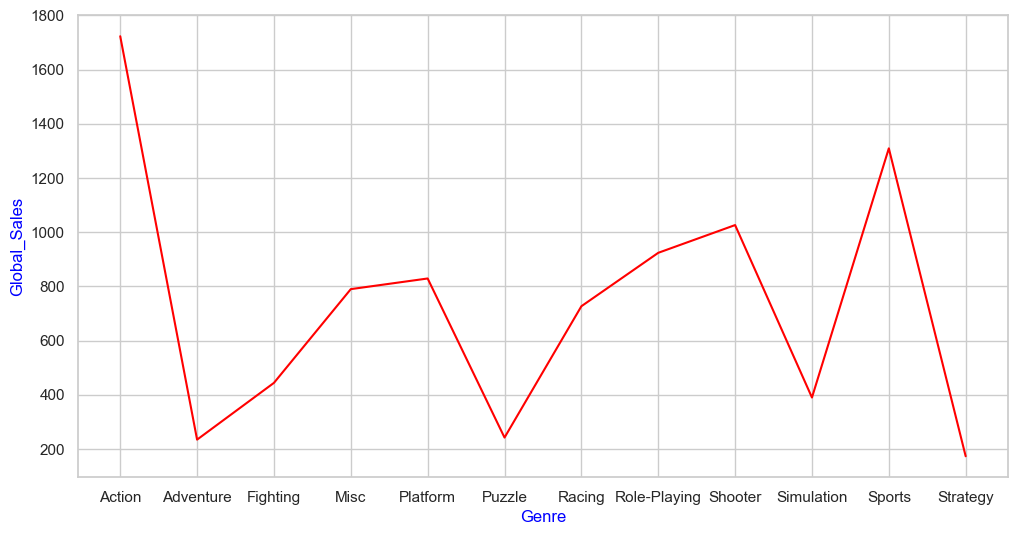

In [28]:
sns.set(style='whitegrid')
sns.set_color_codes('deep')
plt.figure(figsize=(12,6))
sns.lineplot(data=genre_sales, color='red')
plt.xlabel('Genre', color='blue')
plt.ylabel('Global_Sales', color='blue')

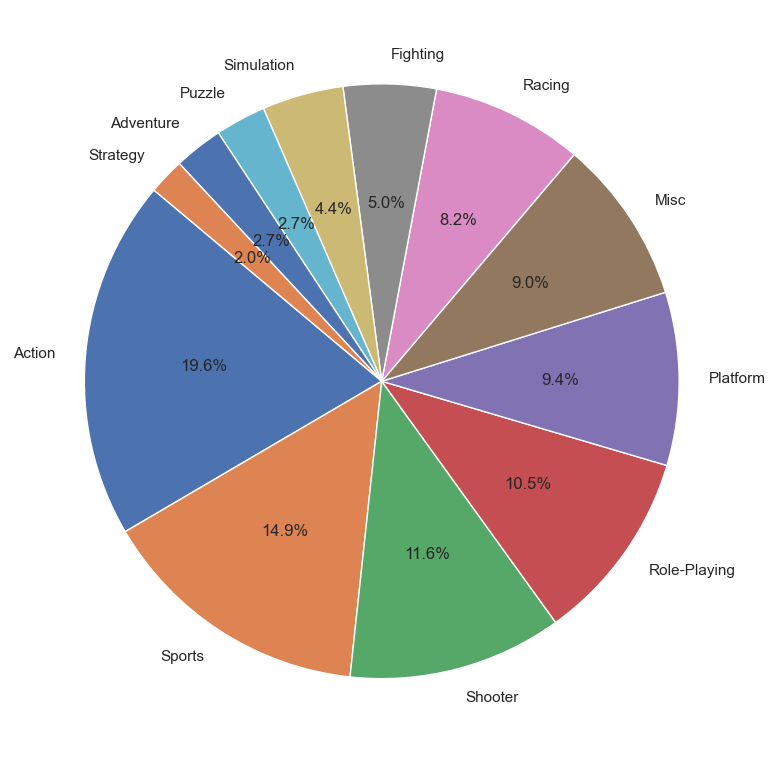

In [29]:
plt.figure(figsize=(8,8))
plt.pie(genre_sales.values, labels=genre_sales.index, autopct='%1.1f%%', startangle=140)
plt.tight_layout()

# Publisher Sales

In [30]:
publisher_sales = original_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(16)
publisher_sales

Publisher
Nintendo                                  1784.43
Electronic Arts                           1093.39
Activision                                 721.41
Sony Computer Entertainment                607.28
Ubisoft                                    473.54
Take-Two Interactive                       399.30
THQ                                        340.44
Konami Digital Entertainment               278.56
Sega                                       270.70
Namco Bandai Games                         253.65
Microsoft Game Studios                     245.79
Capcom                                     199.95
Atari                                      146.77
Square Enix                                144.73
Warner Bros. Interactive Entertainment     142.34
Disney Interactive Studios                 118.76
Name: Global_Sales, dtype: float64

In [31]:
fig = px.area(x=publisher_sales.index, y=publisher_sales.values, width=1000, height=600)
fig.update_layout(
        xaxis_title='Publishers',
        yaxis_title='Global_Sales',
        yaxis=dict(dtick=300)
)
fig.show()

# Sales in North America

## Top Games

In [32]:
games_NA = original_df.groupby('Name')['NA_Sales'].sum().sort_values(ascending=False)
top_games_NA = games_NA.head(20)
top_games_NA

Name
Wii Sports                        41.49
Super Mario Bros.                 32.48
Duck Hunt                         26.93
Tetris                            26.17
Grand Theft Auto V                23.46
Call of Duty: Black Ops           17.01
Super Mario World                 15.99
Mario Kart Wii                    15.85
Wii Sports Resort                 15.75
Call of Duty: Modern Warfare 3    15.58
Kinect Adventures!                14.97
Call of Duty: Ghosts              14.92
New Super Mario Bros. Wii         14.59
Call of Duty: Black Ops II        14.08
Wii Play                          14.03
Call of Duty: Modern Warfare 2    13.52
Super Mario Bros. 3               12.47
Super Mario 64                    11.99
Call of Duty: Black Ops 3         11.89
Grand Theft Auto IV               11.53
Name: NA_Sales, dtype: float64

In [33]:
figure = px.bar(top_games_NA)
figure

## Top Platforms

In [34]:
platforms_NA = original_df.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False)
top_platforms_NA = platforms_NA.head(21)
top_platforms_NA

Platform
X360    594.33
PS2     572.92
Wii     497.37
PS3     388.90
DS      388.53
PS      334.71
XB      182.06
GBA     178.43
N64     138.91
GC      131.94
NES     125.94
GB      113.64
PSP     107.09
PS4      96.80
PC       92.04
XOne     83.19
2600     80.78
3DS      78.03
SNES     61.23
WiiU     38.32
GEN      19.27
Name: NA_Sales, dtype: float64

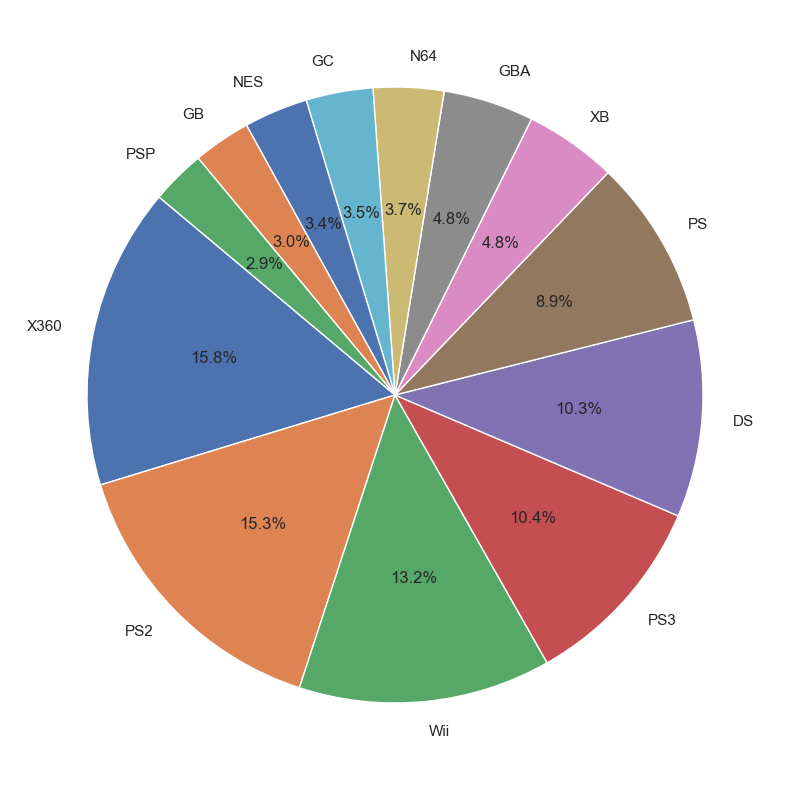

In [35]:
top_platforms_NA = top_platforms_NA[top_platforms_NA > 100]
plt.figure(figsize=(15,10))
plt.pie(top_platforms_NA.values, labels=top_platforms_NA.index, autopct='%1.1f%%', startangle=140)
plt.show()

## Top Publishers

In [36]:
publishers_NA = original_df.groupby('Publisher')['NA_Sales'].sum().sort_values(ascending=False)
top_publishers_NA = publishers_NA.head(21)
top_publishers_NA

Publisher
Nintendo                                  815.75
Electronic Arts                           584.22
Activision                                426.01
Sony Computer Entertainment               265.22
Ubisoft                                   252.81
Take-Two Interactive                      220.47
THQ                                       208.60
Microsoft Game Studios                    155.35
Sega                                      108.78
Atari                                     101.23
Konami Digital Entertainment               88.91
Capcom                                     78.45
Warner Bros. Interactive Entertainment     75.34
Disney Interactive Studios                 70.44
Namco Bandai Games                         69.38
Square Enix                                48.59
LucasArts                                  48.43
Eidos Interactive                          47.85
Midway Games                               45.10
Acclaim Entertainment                      42.75
Bethesda S

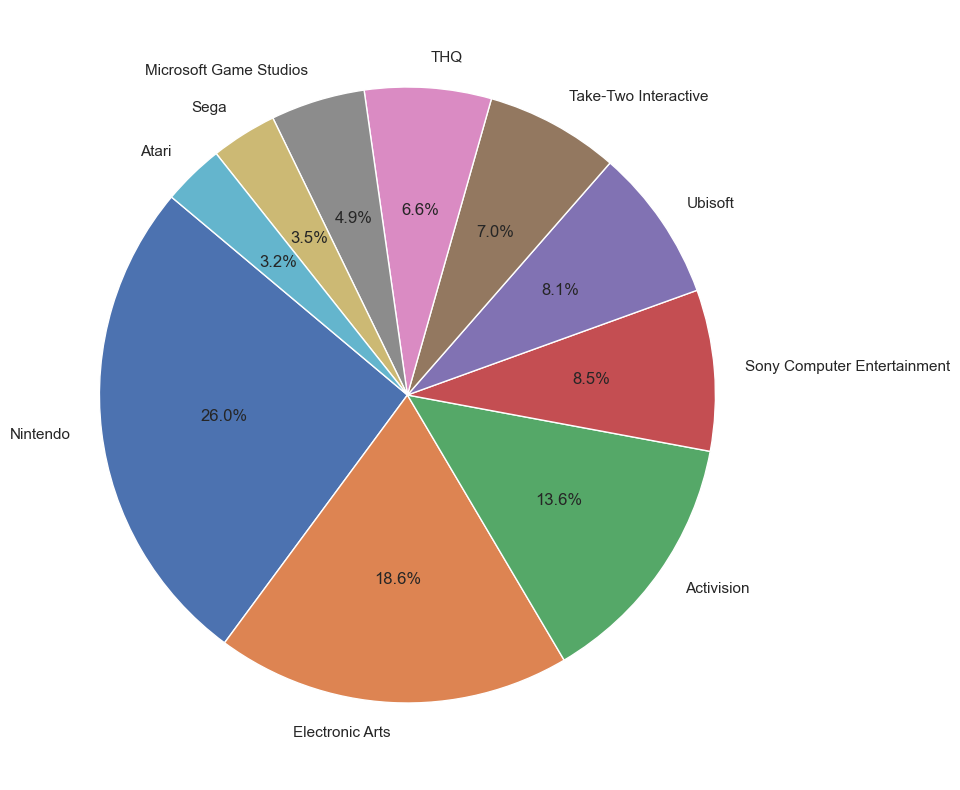

In [37]:
top_publishers_NA = top_publishers_NA[top_publishers_NA > 100]
plt.figure(figsize=(15,10))
plt.pie(top_publishers_NA.values, labels=top_publishers_NA.index, autopct='%1.1f%%', startangle=140)
plt.show()

# Sales in Europe

## Top Games

In [38]:
games_EU = original_df.groupby('Name')['EU_Sales'].sum().sort_values(ascending=False)
top_games_EU = games_EU.head(20)
top_games_EU

Name
Wii Sports                                      29.02
Grand Theft Auto V                              23.04
Mario Kart Wii                                  12.88
FIFA 15                                         12.40
Call of Duty: Modern Warfare 3                  11.29
FIFA 16                                         11.29
FIFA 14                                         11.14
Call of Duty: Black Ops II                      11.05
Wii Sports Resort                               11.01
Nintendogs                                      11.00
FIFA Soccer 13                                  10.25
The Sims 3                                       9.60
Call of Duty: Black Ops 3                        9.56
Brain Age: Train Your Brain in Minutes a Day     9.26
New Super Mario Bros.                            9.23
Wii Play                                         9.20
Call of Duty: Ghosts                             9.05
Pokemon Red/Pokemon Blue                         8.89
Minecraft              

In [40]:
figure = px.bar(top_games_EU)
figure

## Top Platforms

In [41]:
platforms_EU = original_df.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=False)
top_platforms_EU = platforms_EU.head(20)
top_platforms_EU

Platform
PS3     340.47
PS2     332.63
X360    278.00
Wii     264.35
PS      212.38
DS      194.05
PC      137.35
PS4     123.70
GBA      72.49
PSP      67.16
XB       59.65
3DS      58.29
GB       47.51
XOne     45.65
N64      41.03
GC       38.32
WiiU     24.23
NES      21.15
SNES     19.04
PSV      16.27
Name: EU_Sales, dtype: float64

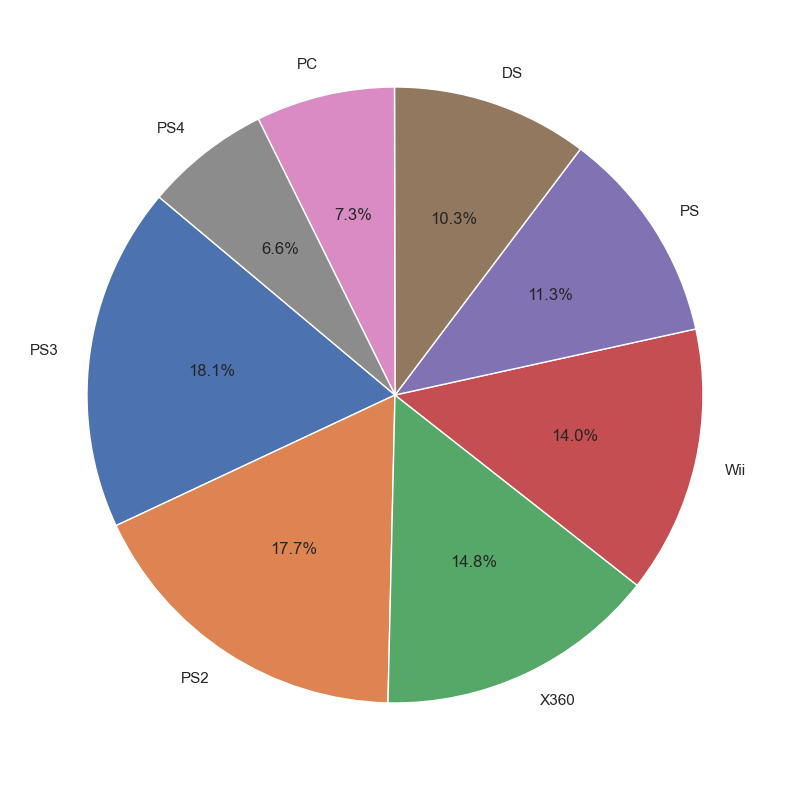

In [42]:
top_platforms_EU = top_platforms_EU[top_platforms_EU > 100]
plt.figure(figsize=(15,10))
plt.pie(top_platforms_EU.values, labels=top_platforms_EU.index, autopct='%1.1f%%', startangle=140)
plt.show()

## Top Publishers

In [43]:
publishers_EU = original_df.groupby('Publisher')['EU_Sales'].sum().sort_values(ascending=False)
top_publishers_EU = publishers_EU.head(20)
top_publishers_EU

Publisher
Nintendo                                  418.30
Electronic Arts                           367.38
Activision                                213.72
Sony Computer Entertainment               187.55
Ubisoft                                   163.03
Take-Two Interactive                      117.95
THQ                                        94.60
Sega                                       81.41
Konami Digital Entertainment               68.62
Microsoft Game Studios                     68.61
Warner Bros. Interactive Entertainment     48.83
Namco Bandai Games                         42.61
Capcom                                     39.16
Eidos Interactive                          34.85
Disney Interactive Studios                 34.36
Square Enix                                32.57
Bethesda Softworks                         30.48
Codemasters                                28.65
LucasArts                                  26.00
Atari                                      25.80
Name: EU_S

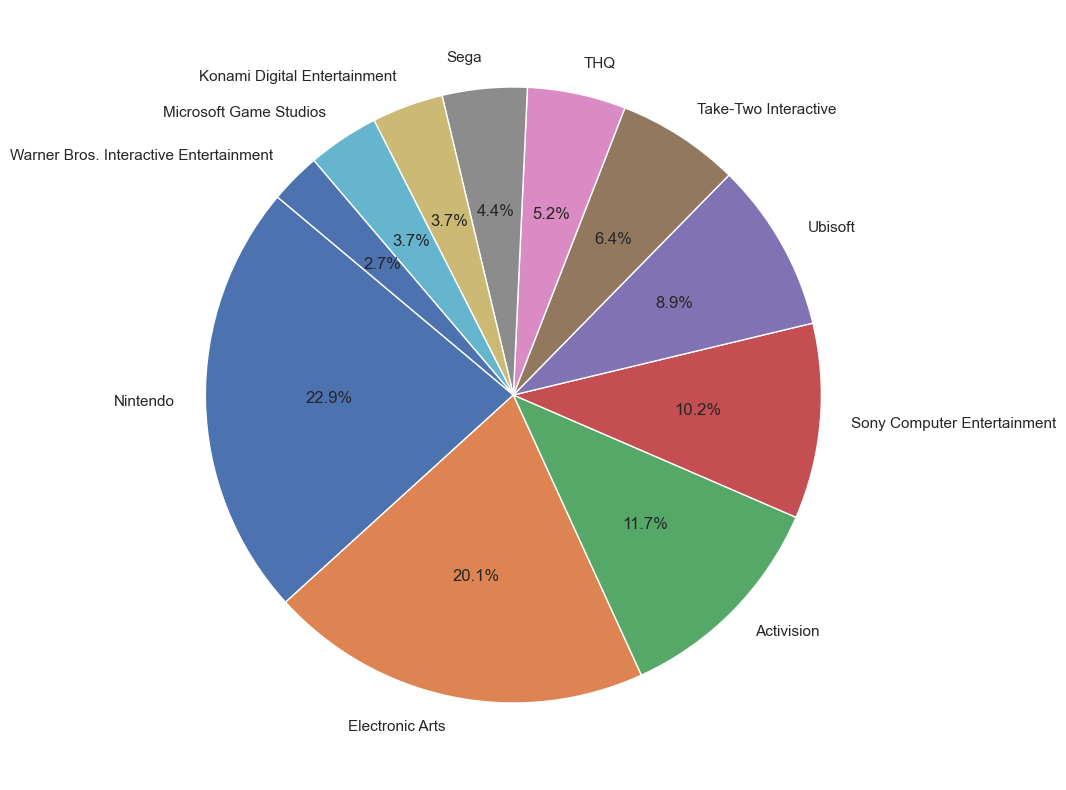

In [44]:
top_publishers_EU = top_publishers_EU[top_publishers_EU > 48]
plt.figure(figsize=(15,10))
plt.pie(top_publishers_EU.values, labels=top_publishers_EU.index, autopct='%1.1f%%', startangle=140)
plt.show()

# Sales in Japan

## Top Games

In [45]:
games_JP = original_df.groupby('Name')['JP_Sales'].sum().sort_values(ascending=False)
top_games_JP = games_JP.head(20)
top_games_JP

Name
Pokemon Red/Pokemon Blue                         10.22
Pokemon Gold/Pokemon Silver                       7.20
Super Mario Bros.                                 6.96
New Super Mario Bros.                             6.50
Pokemon Diamond/Pokemon Pearl                     6.04
Tetris                                            6.03
Pokemon Black/Pokemon White                       5.65
Dragon Quest VII: Warriors of Eden                5.40
Pokemon Ruby/Pokemon Sapphire                     5.38
Animal Crossing: Wild World                       5.33
Brain Age 2: More Training in Minutes a Day       5.32
Final Fantasy III                                 5.12
Monster Hunter Freedom 3                          4.87
New Super Mario Bros. Wii                         4.70
Super Mario Bros. 3                               4.67
Dragon Warrior III                                4.58
Super Mario World                                 4.49
Dragon Quest VIII: Journey of the Cursed King     4.47
Drago

In [46]:
figure = px.bar(top_games_JP)
figure

## Top Platforms

In [47]:
platforms_JP = original_df.groupby('Platform')['JP_Sales'].sum().sort_values(ascending=False)
top_platforms_JP = platforms_JP.head(20)
top_platforms_JP

Platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
NES      98.65
3DS      97.30
GB       85.12
PS3      79.21
PSP      75.89
Wii      68.28
GBA      46.56
N64      33.76
SAT      32.26
GC       21.34
PSV      20.86
PS4      14.30
WiiU     12.79
X360     12.30
DC        8.56
GEN       2.67
Name: JP_Sales, dtype: float64

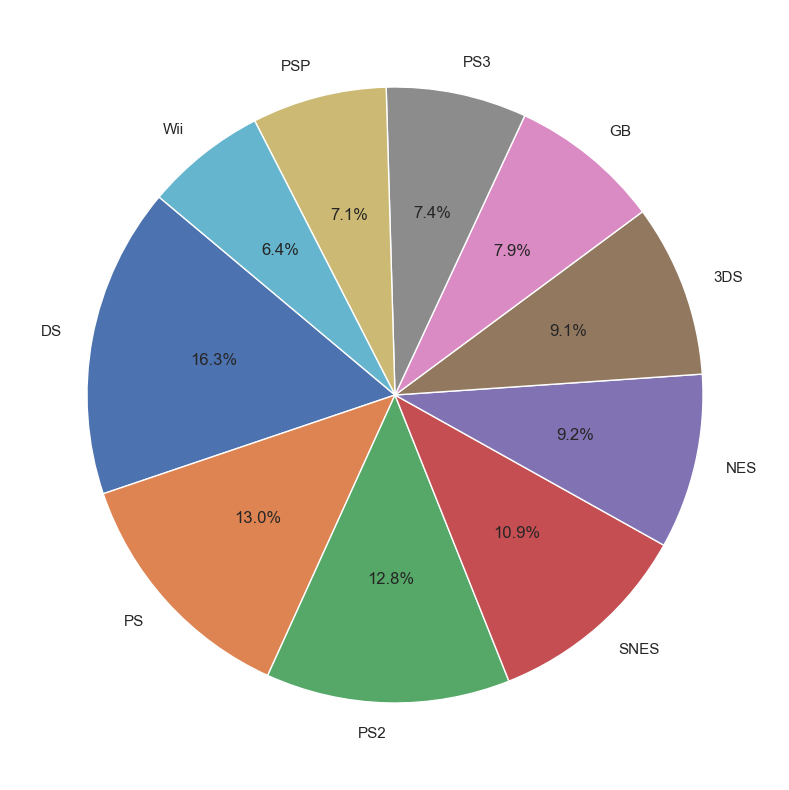

In [48]:
top_platforms_JP = top_platforms_JP[top_platforms_JP > 50]
plt.figure(figsize=(15,10))
plt.pie(top_platforms_JP.values, labels=top_platforms_JP.index, autopct='%1.1f%%', startangle=140)
plt.show()

## Top Publishers

In [49]:
publishers_JP = original_df.groupby("Publisher")['JP_Sales'].sum().sort_values(ascending=False)
top_publishers_JP = publishers_JP.head(10)
top_publishers_JP

Publisher
Nintendo                        454.99
Namco Bandai Games              126.84
Konami Digital Entertainment     90.93
Sony Computer Entertainment      74.10
Capcom                           67.38
Sega                             56.19
Square Enix                      49.79
SquareSoft                       40.13
Enix Corporation                 32.40
Tecmo Koei                       29.21
Name: JP_Sales, dtype: float64

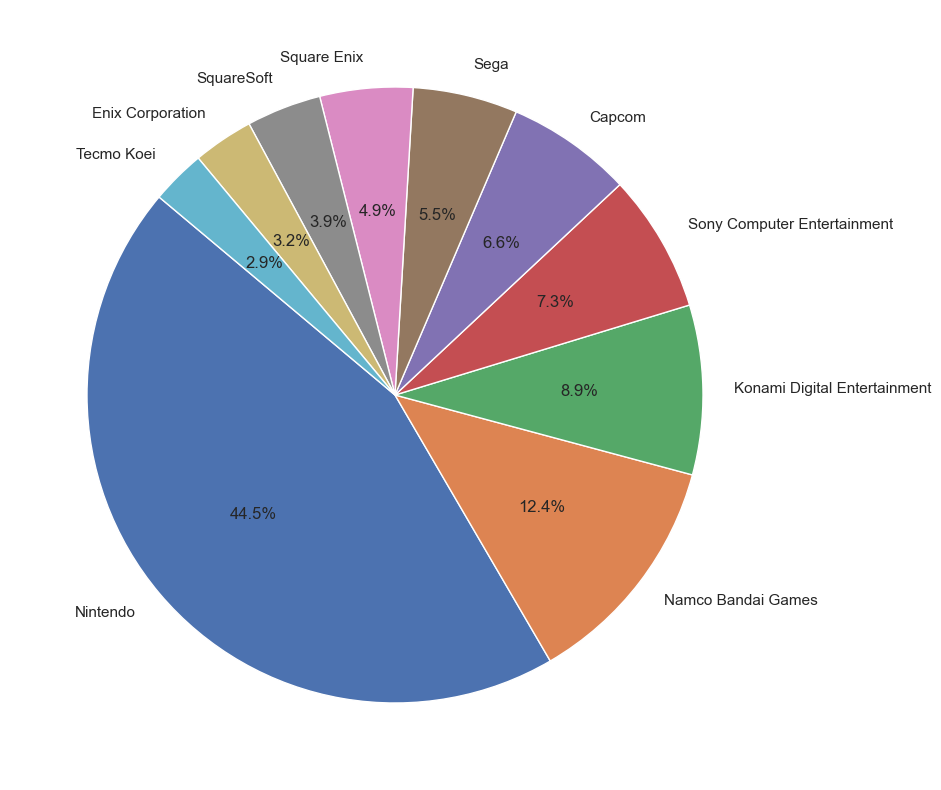

In [50]:
top_publishers_JP = top_publishers_JP[top_publishers_JP > 20]
plt.figure(figsize=(15,10))
plt.pie(top_publishers_JP.values, labels=top_publishers_JP.index, autopct='%1.1f%%', startangle=140)
plt.show()

# Yearly Sales

In [51]:
yearly_sales_df = original_df.groupby('Year')['Global_Sales'].sum()
yearly_sales_df

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    414.01
2005.0    458.51
2006.0    521.04
2007.0    609.92
2008.0    678.90
2009.0    667.30
2010.0    600.29
2011.0    515.80
2012.0    363.49
2013.0    368.11
2014.0    337.03
2015.0    264.44
2016.0     70.90
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64

In [52]:
px.line(yearly_sales_df)

## Year 2000 -> 2005 (Y1)

In [53]:
y1_df = original_df[(original_df['Year'] >= 2000) & (original_df['Year'] <= 2005) ]
y1_df.head()

Rank                                          Name Platform    Year  \
10    11                                    Nintendogs       DS  2005.0   
11    12                                 Mario Kart DS       DS  2005.0   
17    18                 Grand Theft Auto: San Andreas      PS2  2004.0   
19    20  Brain Age: Train Your Brain in Minutes a Day       DS  2005.0   
24    25                   Grand Theft Auto: Vice City      PS2  2002.0   

         Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
10  Simulation              Nintendo      9.07     11.00      1.93   
11      Racing              Nintendo      9.81      7.57      4.13   
17      Action  Take-Two Interactive      9.43      0.40      0.41   
19        Misc              Nintendo      4.75      9.26      4.16   
24      Action  Take-Two Interactive      8.41      5.49      0.47   

    Other_Sales  Global_Sales  
10         2.75         24.76  
11         1.92         23.42  
17        10.57         20.81  
19         2.05         20.22  
24         1.78         16.15

In [54]:
y1_df.count()

Rank            4115
Name            4115
Platform        4115
Year            4115
Genre           4115
Publisher       4115
NA_Sales        4115
EU_Sales        4115
JP_Sales        4115
Other_Sales     4115
Global_Sales    4115
dtype: int64

### Genre in above year cap

In [55]:
y1_genre_df = y1_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
y1_genre_counts = y1_df['Genre'].value_counts()
print(y1_genre_counts)
y1_genre_df

Genre
Sports          718
Action          697
Racing          474
Shooter         392
Platform        380
Misc            321
Role-Playing    304
Fighting        227
Adventure       171
Simulation      162
Strategy        156
Puzzle          113
Name: count, dtype: int64


Genre
Action          410.08
Sports          337.37
Racing          262.47
Platform        215.10
Role-Playing    209.00
Shooter         195.85
Misc            157.45
Fighting        123.59
Simulation      115.06
Puzzle           48.46
Adventure        42.33
Strategy         42.16
Name: Global_Sales, dtype: float64

In [56]:
px.bar(y1_genre_counts)

In [57]:
px.bar(y1_genre_df)

### Platform in above year cap

In [58]:
y1_platform_df = y1_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
y1_platform_counts = y1_df['Platform'].value_counts()
print(y1_platform_counts.head(13))
y1_platform_df.head(13)

Platform
PS2     1322
GBA      742
XB       737
GC       498
PS       273
PC       142
DS       141
PSP      112
N64       70
DC        29
GB        27
X360      18
WS         4
Name: count, dtype: int64


Platform
PS2     967.66
GBA     298.05
XB      241.21
GC      185.58
DS      148.86
PS      140.54
PSP      51.36
PC       42.68
N64      37.35
GB       29.00
X360      8.32
DC        7.35
WS        0.96
Name: Global_Sales, dtype: float64

In [59]:
# figure left count
px.bar(y1_platform_counts.head(13))

In [60]:
# figure left sales
px.bar(y1_platform_df.head(13))

### Publisher in above year cap

In [61]:
y1_publisher_df = y1_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
y1_publisher_counts = y1_df['Publisher'].value_counts()
print(y1_publisher_counts.head(13))
y1_publisher_df.head(13)

Publisher
Electronic Arts                 450
THQ                             282
Konami Digital Entertainment    250
Activision                      237
Ubisoft                         226
Sony Computer Entertainment     210
Nintendo                        196
Atari                           173
Sega                            150
Namco Bandai Games              140
Midway Games                    116
Capcom                          112
Acclaim Entertainment           107
Name: count, dtype: int64


Publisher
Nintendo                        353.99
Electronic Arts                 347.43
Sony Computer Entertainment     176.69
Activision                      155.01
THQ                             145.29
Take-Two Interactive            107.72
Konami Digital Entertainment     91.87
Ubisoft                          74.73
Atari                            71.08
Namco Bandai Games               61.30
Sega                             58.83
Microsoft Game Studios           49.73
Capcom                           49.08
Name: Global_Sales, dtype: float64

In [62]:
px.bar(y1_publisher_counts.head(13))

In [63]:
px.bar(y1_publisher_df.head(13))

## Year 2006 -> 2010 (Y2)

In [64]:
y2_df = original_df[(original_df['Year'] >= 2006) & (original_df['Year'] <= 2010)]
y2_df.head()

Rank                   Name Platform    Year     Genre Publisher  NA_Sales  \
0     1             Wii Sports      Wii  2006.0    Sports  Nintendo     41.49   
2     3         Mario Kart Wii      Wii  2008.0    Racing  Nintendo     15.85   
3     4      Wii Sports Resort      Wii  2009.0    Sports  Nintendo     15.75   
6     7  New Super Mario Bros.       DS  2006.0  Platform  Nintendo     11.38   
7     8               Wii Play      Wii  2006.0      Misc  Nintendo     14.03   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00  
6      9.23      6.50         2.90         30.01  
7      9.20      2.93         2.85         29.02

In [65]:
y1_df.count()

Rank            4115
Name            4115
Platform        4115
Year            4115
Genre           4115
Publisher       4115
NA_Sales        4115
EU_Sales        4115
JP_Sales        4115
Other_Sales     4115
Global_Sales    4115
dtype: int64

### Genre in above year cap

In [66]:
y2_genre_df = y2_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
y2_genre_counts = y2_df['Genre'].value_counts()
print(y2_genre_counts)
y2_genre_df

Genre
Action          1114
Misc             879
Sports           875
Adventure        616
Role-Playing     531
Simulation       470
Shooter          409
Racing           384
Puzzle           297
Strategy         277
Fighting         255
Platform         218
Name: count, dtype: int64


Genre
Action          566.47
Sports          560.75
Misc            419.24
Shooter         316.22
Role-Playing    279.87
Racing          213.04
Platform        194.08
Simulation      173.20
Fighting        122.58
Adventure        98.21
Puzzle           81.98
Strategy         51.81
Name: Global_Sales, dtype: float64

In [67]:
px.bar(y2_genre_counts)

In [68]:
px.bar(y2_genre_df)

### Platform in above year cap

In [69]:
y2_platform_df = y2_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
y2_platform_counts = y2_df['Platform'].value_counts()
print(y2_platform_counts.head(11))
y2_platform_df.head(11)

Platform
DS      1802
Wii     1092
PS2      798
PSP      773
X360     717
PS3      599
PC       388
XB        66
GBA       44
GC        44
DC         2
Name: count, dtype: int64


Platform
Wii     809.28
DS      628.37
X360    575.38
PS3     491.33
PS2     265.33
PSP     211.19
PC       66.50
GC       11.56
XB       10.88
GBA       7.57
DC        0.06
Name: Global_Sales, dtype: float64

In [70]:
px.bar(y2_platform_counts.head(11))

In [71]:
px.bar(y2_platform_df.head(11))

### Publisher in above year cap

In [72]:
y2_publisher_df = y2_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
y2_publisher_counts = y2_df['Publisher'].value_counts()
print(y2_publisher_counts.head(17))
y2_publisher_df.head(17)

Publisher
Electronic Arts                 529
Ubisoft                         435
Activision                      423
THQ                             321
Konami Digital Entertainment    318
Namco Bandai Games              299
Sega                            246
Sony Computer Entertainment     217
Take-Two Interactive            187
Nintendo                        187
Disney Interactive Studios      133
Tecmo Koei                      127
D3Publisher                     118
Atari                           117
505 Games                       115
Capcom                          107
Square Enix                     102
Name: count, dtype: int64


Publisher
Nintendo                                  590.97
Electronic Arts                           381.44
Activision                                289.83
Ubisoft                                   212.94
Sony Computer Entertainment               169.41
THQ                                       141.62
Take-Two Interactive                      141.53
Sega                                      124.50
Microsoft Game Studios                    116.16
Konami Digital Entertainment               94.27
Disney Interactive Studios                 78.46
Capcom                                     68.49
Square Enix                                68.03
Namco Bandai Games                         63.37
LucasArts                                  50.10
Warner Bros. Interactive Entertainment     43.20
505 Games                                  42.52
Name: Global_Sales, dtype: float64

In [73]:
px.bar(y2_publisher_counts.head(17))

In [74]:
px.bar(y2_publisher_df.head(17))

## Year 2011 -> 2014 (Y3)

In [75]:
y3_df = original_df[(original_df['Year'] >= 2011) & (original_df['Year'] <= 2014)]
y3_df.head()

Rank                            Name Platform    Year         Genre  \
16    17              Grand Theft Auto V      PS3  2013.0        Action   
23    24              Grand Theft Auto V     X360  2013.0        Action   
29    30  Call of Duty: Modern Warfare 3     X360  2011.0       Shooter   
32    33             Pokemon X/Pokemon Y      3DS  2013.0  Role-Playing   
34    35      Call of Duty: Black Ops II      PS3  2012.0       Shooter   

               Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
16  Take-Two Interactive      7.01      9.27      0.97         4.14   
23  Take-Two Interactive      9.63      5.31      0.06         1.38   
29            Activision      9.03      4.28      0.13         1.32   
32              Nintendo      5.17      4.05      4.34         0.79   
34            Activision      4.99      5.88      0.65         2.52   

    Global_Sales  
16         21.40  
23         16.38  
29         14.76  
32         14.35  
34         14.03

In [76]:
y3_df.count()

Rank            2917
Name            2917
Platform        2917
Year            2917
Genre           2917
Publisher       2917
NA_Sales        2917
EU_Sales        2917
JP_Sales        2917
Other_Sales     2917
Global_Sales    2917
dtype: int64

### Genre in above year cap

In [77]:
y3_genre_df = y3_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
y3_genre_counts = y3_df['Genre'].value_counts()
print(y3_genre_counts)
y3_genre_df

Genre
Action          838
Role-Playing    334
Misc            305
Adventure       301
Sports          284
Shooter         248
Racing          137
Fighting        122
Simulation      102
Platform         95
Strategy         87
Puzzle           64
Name: count, dtype: int64


Genre
Action          465.21
Shooter         301.02
Role-Playing    191.95
Sports          176.13
Misc            128.33
Platform         80.65
Racing           79.19
Fighting         55.55
Simulation       42.86
Adventure        34.64
Strategy         19.55
Puzzle            9.35
Name: Global_Sales, dtype: float64

In [78]:
px.bar(y3_genre_counts)

In [79]:
px.bar(y3_genre_df)

### Platform in above year cap

In [80]:
y3_platform_df = y3_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
y3_platform_counts = y3_df['Platform'].value_counts()
print(y3_platform_counts.head(12))
y3_platform_df.head(12)

Platform
PS3     599
X360    451
3DS     378
PSP     309
PC      280
PSV     237
Wii     194
DS      186
WiiU    105
PS4      91
XOne     80
PS2       7
Name: count, dtype: int64


Platform
PS3     437.21
X360    372.02
3DS     212.68
PS4     123.52
Wii      98.98
PC       84.81
XOne     71.03
WiiU     62.19
PSV      51.11
DS       41.37
PSP      29.04
PS2       0.47
Name: Global_Sales, dtype: float64

In [81]:
px.bar(y3_platform_counts.head(12))

In [82]:
px.bar(y3_platform_df.head(12))

### Publisher in above year cap

In [83]:
y3_publisher_df = y3_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
y3_publisher_counts = y3_df['Publisher'].value_counts()
print(y3_publisher_counts.head(15))
y3_publisher_df.head(15)

Publisher
Namco Bandai Games                        293
Electronic Arts                           200
Activision                                197
Ubisoft                                   192
Konami Digital Entertainment              110
Sega                                      100
Nintendo                                  100
Warner Bros. Interactive Entertainment     96
Take-Two Interactive                       90
Sony Computer Entertainment                85
THQ                                        85
Square Enix                                75
Capcom                                     73
Tecmo Koei                                 73
Idea Factory                               62
Name: count, dtype: int64


Publisher
Electronic Arts                           221.87
Nintendo                                  209.44
Activision                                192.96
Ubisoft                                   154.68
Take-Two Interactive                      122.28
Warner Bros. Interactive Entertainment     73.15
Sony Computer Entertainment                71.88
Microsoft Game Studios                     63.31
Namco Bandai Games                         57.61
Square Enix                                47.04
Bethesda Softworks                         38.67
Sega                                       36.92
THQ                                        33.82
Capcom                                     30.10
Konami Digital Entertainment               28.44
Name: Global_Sales, dtype: float64

In [84]:
px.bar(y3_publisher_counts.head(15))

In [85]:
px.bar(y3_publisher_df.head(15))

## Year 2014 -> 2020 (Y4)

In [86]:
y4_df = original_df[(original_df['Year'] >= 2014) & (original_df['Year'] <= 2020)]
y4_df.head()

Rank                                       Name Platform    Year  \
33    34                  Call of Duty: Black Ops 3      PS4  2015.0   
44    45                         Grand Theft Auto V      PS4  2014.0   
49    50  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS  2014.0   
77    78                                    FIFA 16      PS4  2015.0   
92    93               Star Wars Battlefront (2015)      PS4  2015.0   

           Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
33       Shooter            Activision      5.77      5.81      0.35   
44        Action  Take-Two Interactive      3.80      5.81      0.36   
49  Role-Playing              Nintendo      4.23      3.37      3.08   
77        Sports       Electronic Arts      1.11      6.06      0.06   
92       Shooter       Electronic Arts      2.93      3.29      0.22   

    Other_Sales  Global_Sales  
33         2.31         14.24  
44         2.02         11.98  
49         0.65         11.33  
77         1.26          8.49  
92         1.23          7.67

In [87]:
y4_df.count()

Rank            1540
Name            1540
Platform        1540
Year            1540
Genre           1540
Publisher       1540
NA_Sales        1540
EU_Sales        1540
JP_Sales        1540
Other_Sales     1540
Global_Sales    1540
dtype: int64

## Genre in above year cap

In [88]:
y4_genre_df = y4_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
y4_genre_counts = y4_df['Genre'].value_counts()
print(y4_genre_counts)
y4_genre_df

Genre
Action          560
Role-Playing    210
Adventure       162
Sports          155
Shooter         113
Misc             98
Racing           66
Fighting         58
Simulation       36
Strategy         35
Platform         34
Puzzle           13
Name: count, dtype: int64


Genre
Action          189.63
Shooter         150.37
Sports          102.80
Role-Playing     89.09
Misc             36.54
Fighting         27.79
Racing           26.25
Platform         17.01
Adventure        15.88
Simulation       11.85
Strategy          3.31
Puzzle            2.19
Name: Global_Sales, dtype: float64

In [89]:
px.bar(y4_genre_counts)

In [90]:
px.bar(y4_genre_df)

## Platform in above year cap

In [91]:
y4_platform_df = y4_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
y4_platform_counts = y4_df['Platform'].value_counts()
print(y4_platform_counts.head(11))
y4_platform_df.head(11)

Platform
PS4     320
PSV     275
PS3     214
3DS     199
XOne    194
PC      132
X360    112
WiiU     69
PSP      13
Wii      10
DS        2
Name: count, dtype: int64


Platform
PS4     253.34
XOne    122.46
3DS      76.72
PS3      71.77
X360     50.29
WiiU     42.18
PSV      25.23
PC       24.06
Wii       5.99
PSP       0.36
DS        0.31
Name: Global_Sales, dtype: float64

In [92]:
px.bar(y4_platform_counts.head(11))

In [93]:
px.bar(y4_platform_df.head(11))

## Publisher in above year cap

In [94]:
y4_publisher_df = y4_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
y4_publisher_counts = y4_df['Publisher'].value_counts()
print(y4_publisher_counts.head(15))
y4_publisher_df.head(15)

Publisher
Namco Bandai Games                        177
Activision                                 95
Ubisoft                                    90
Electronic Arts                            88
Tecmo Koei                                 79
Warner Bros. Interactive Entertainment     70
Square Enix                                62
Nintendo                                   62
Take-Two Interactive                       44
Sega                                       43
Nippon Ichi Software                       42
Capcom                                     38
Konami Digital Entertainment               38
Idea Factory                               35
Deep Silver                                30
Name: count, dtype: int64


Publisher
Electronic Arts                           104.47
Activision                                 83.78
Nintendo                                   79.20
Ubisoft                                    64.79
Take-Two Interactive                       48.18
Warner Bros. Interactive Entertainment     43.68
Sony Computer Entertainment                36.59
Namco Bandai Games                         31.69
Bethesda Softworks                         27.37
Square Enix                                22.74
Microsoft Game Studios                     21.68
Konami Digital Entertainment               13.13
Sony Computer Entertainment Europe          8.24
Capcom                                      8.08
Sega                                        8.00
Name: Global_Sales, dtype: float64

In [95]:
px.bar(y4_publisher_counts.head(15))

In [96]:
px.bar(y4_publisher_df.head(15))

# Platform vs Genre

In [97]:
pl_vs_gen_df = original_df.groupby("Platform")["Genre"].value_counts().sort_values(ascending=False)

In [98]:
pl_vs_gen_df.head()

Platform  Genre 
PS2       Sports    391
DS        Misc      389
PS3       Action    373
PS2       Action    345
DS        Action    335
Name: count, dtype: int64

In [99]:
platform = pd.DataFrame(pl_vs_gen_df)
platform = platform.reset_index()
platform.head()

Platform   Genre  count
0      PS2  Sports    391
1       DS    Misc    389
2      PS3  Action    373
3      PS2  Action    345
4       DS  Action    335

In [100]:
ps2_df = platform[platform['Platform'] == 'PS2']
x360_df = platform[platform['Platform'] == 'X360']
ps3_df = platform[platform['Platform'] == 'PS3']
wii_df = platform[platform['Platform'] == 'Wii']
ds_df = platform[platform['Platform'] == 'DS']

In [101]:
ps2_df

Platform         Genre  count
0        PS2        Sports    391
3        PS2        Action    345
13       PS2          Misc    218
17       PS2        Racing    212
20       PS2     Adventure    196
24       PS2  Role-Playing    183
29       PS2       Shooter    158
34       PS2      Fighting    146
52       PS2      Platform    101
58       PS2    Simulation     89
76       PS2      Strategy     70
165      PS2        Puzzle     18

In [102]:
fig_ps2 = px.bar(ps2_df, x='Genre', y='count',
                 title='PS2 Game Genres',
                 labels={'Count': 'Number of Games', 'Genre': 'Game Genre'},
                 color='Genre')

fig_ps2.update_layout(xaxis={'categoryorder':'total descending'})
fig_ps2.show()

In [103]:
x360_df

Platform         Genre  count
5       X360        Action    318
15      X360        Sports    215
19      X360       Shooter    197
42      X360          Misc    122
51      X360        Racing    102
71      X360  Role-Playing     75
81      X360      Fighting     65
102     X360     Adventure     47
118     X360    Simulation     36
135     X360      Strategy     27
144     X360      Platform     24
227     X360        Puzzle      6

In [104]:
fig_x360 = px.bar(x360_df, x='Genre', y='count',
                  title='Xbox 360 Game Genres',
                  labels={'Count': 'Number of Games', 'Genre': 'Game Genre'},
                  color='Genre')
fig_x360.update_layout(xaxis={'categoryorder':'total descending'})
fig_x360.show()

In [105]:
ps3_df

Platform         Genre  count
2        PS3        Action    373
18       PS3        Sports    210
30       PS3       Shooter    155
44       PS3          Misc    121
45       PS3  Role-Playing    117
57       PS3        Racing     90
70       PS3      Fighting     76
75       PS3     Adventure     72
116      PS3      Platform     36
129      PS3    Simulation     30
154      PS3      Strategy     22
266      PS3        Puzzle      2

In [106]:
fig_ps3 = px.bar(ps3_df, x='Genre', y='count',
                 title='PS3 Game Genres',
                 labels={'Count': 'Number of Games', 'Genre': 'Game Genre'},
                 color='Genre')  # Adding color distinction by Genre
fig_ps3.update_layout(xaxis={'categoryorder':'total descending'})
fig_ps3.show()

In [107]:
wii_df

Platform         Genre  count
7        Wii          Misc    272
8        Wii        Sports    256
11       Wii        Action    230
56       Wii        Racing     92
64       Wii    Simulation     84
65       Wii     Adventure     83
87       Wii       Shooter     61
92       Wii      Platform     57
95       Wii        Puzzle     54
110      Wii      Fighting     41
122      Wii  Role-Playing     35
142      Wii      Strategy     25

In [108]:
fig_ds = px.bar(ds_df, x='Genre', y='count',
                title='DS Game Genres',
                labels={'Count': 'Number of Games', 'Genre': 'Game Genre'},
                color='Genre')
fig_ds.update_layout(xaxis={'categoryorder':'total descending'})
fig_ds.show()

In [109]:
ds_df

Platform         Genre  count
1         DS          Misc    389
4         DS        Action    335
6         DS    Simulation    280
9         DS     Adventure    238
10        DS        Puzzle    236
21        DS  Role-Playing    196
33        DS        Sports    146
59        DS      Platform     89
68        DS      Strategy     78
80        DS        Racing     66
108       DS       Shooter     42
120       DS      Fighting     36

In [110]:
fig_wii = px.bar(wii_df, x='Genre', y='count',
                 title='Wii Game Genres',
                 labels={'Count': 'Number of Games', 'Genre': 'Game Genre'},
                 color='Genre')
fig_wii.update_layout(xaxis={'categoryorder':'total descending'})
fig_wii.show()

# Publisher vs Genre

In [111]:
pub_vs_gen_df = original_df.groupby("Publisher")["Genre"].value_counts()
pub_vs_gen_df = pub_vs_gen_df.sort_values(ascending=False)[:30]
pub_vs_gen_df

Publisher                               Genre       
Electronic Arts                         Sports          554
Activision                              Action          308
Konami Digital Entertainment            Sports          279
Namco Bandai Games                      Action          247
Ubisoft                                 Action          193
THQ                                     Action          193
Electronic Arts                         Action          182
                                        Racing          159
Activision                              Shooter         155
Capcom                                  Action          154
Take-Two Interactive                    Sports          151
Namco Bandai Games                      Role-Playing    151
Ubisoft                                 Misc            151
Warner Bros. Interactive Entertainment  Action          150
Konami Digital Entertainment            Action          143
Activision                              Sports 

In [112]:
publisher = pd.DataFrame(pub_vs_gen_df)
publisher = publisher.reset_index()
publisher.head()

Publisher   Genre  count
0               Electronic Arts  Sports    554
1                    Activision  Action    308
2  Konami Digital Entertainment  Sports    279
3            Namco Bandai Games  Action    247
4                       Ubisoft  Action    193

In [113]:
ea_df = publisher[publisher['Publisher'] == 'Electronic Arts']
acti_df = publisher[publisher['Publisher'] == 'Activision']
kde_df = publisher[publisher['Publisher'] == 'Konami Digital Entertainment']
nbg_df = publisher[publisher['Publisher'] == 'Namco Bandai Games']
ubi_df = publisher[publisher['Publisher'] == 'Ubisoft']

In [114]:
ea_df

Publisher       Genre  count
0   Electronic Arts      Sports    554
6   Electronic Arts      Action    182
7   Electronic Arts      Racing    159
16  Electronic Arts     Shooter    139
24  Electronic Arts  Simulation    116

In [115]:
fig = px.bar(ea_df, x='Genre', y='count',
             title='Game Genre Distribution for Electronic Arts',
             labels={'Game_Count': 'Number of Games', 'Genre': 'Genre'})
fig.show()

In [116]:
acti_df

Publisher    Genre  count
1   Activision   Action    308
8   Activision  Shooter    155
15  Activision   Sports    142
27  Activision     Misc    103

In [117]:
fig_acti = px.bar(acti_df, x='Genre', y='count',
                  title='Game Genre Distribution for Activision',
                  labels={'Game_Count': 'Number of Games', 'Genre': 'Genre'})
fig_acti.show()

In [118]:
kde_df

Publisher   Genre  count
2   Konami Digital Entertainment  Sports    279
14  Konami Digital Entertainment  Action    143

In [119]:
fig_kde = px.bar(kde_df, x='Genre', y='count',
                 title='Game Genre Distribution for Konami Digital Entertainment',
                 labels={'Game_Count': 'Number of Games', 'Genre': 'Genre'})
fig_kde.show()

In [120]:
nbg_df

Publisher         Genre  count
3   Namco Bandai Games        Action    247
11  Namco Bandai Games  Role-Playing    151
19  Namco Bandai Games      Fighting    134

In [121]:
fig_nbg = px.bar(nbg_df, x='Genre', y='count',
                 title='Game Genre Distribution for Namco Bandai Games',
                 labels={'Game_Count': 'Number of Games', 'Genre': 'Genre'})
fig_nbg.show()

In [122]:
ubi_df

Publisher       Genre  count
4    Ubisoft      Action    193
12   Ubisoft        Misc    151
23   Ubisoft  Simulation    118

In [123]:
fig_ubi = px.bar(ubi_df, x='Genre', y='count',
                 title='Game Genre Distribution for Ubisoft',
                 labels={'Game_Count': 'Number of Games', 'Genre': 'Genre'})
fig_ubi.show()

# Comparision by Platform

In [124]:
platform_sales_NA = original_df.groupby('Platform')['NA_Sales'].sum()
platform_sales_EU = original_df.groupby('Platform')['EU_Sales'].sum()
platform_sales_JP = original_df.groupby('Platform')['JP_Sales'].sum()
platform_sales_Other = original_df.groupby('Platform')['Other_Sales'].sum()

In [125]:
platform_sales_comparison = pd.DataFrame({
    'NA_Sales': platform_sales_NA,
    'EU_Sales': platform_sales_EU,
    'JP_Sales': platform_sales_JP,
    'Other_Sales': platform_sales_Other
}).reset_index()

In [126]:
platform_sales_comparison

Platform  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0      2600     80.78      4.86      0.00         0.84
1       3DO      0.00      0.00      0.10         0.00
2       3DS     78.03     58.29     97.30        12.55
3        DC      5.43      1.69      8.56         0.27
4        DS    388.53    194.05    175.02        60.29
5        GB    113.64     47.51     85.12         8.16
6       GBA    178.43     72.49     46.56         7.51
7        GC    131.94     38.32     21.34         5.13
8       GEN     19.27      5.52      2.67         0.89
9        GG      0.00      0.00      0.04         0.00
10      N64    138.91     41.03     33.76         4.31
11      NES    125.94     21.15     98.65         5.31
12       NG      0.00      0.00      1.44         0.00
13       PC     92.04    137.35      0.17        24.33
14     PCFX      0.00      0.00      0.03         0.00
15       PS    334.71    212.38    139.78        40.69
16      PS2    572.92    332.63    137.54       190.47
17      PS3    388.90    340.47     79.21       140.81
18      PS4     96.80    123.70     14.30        43.36
19      PSP    107.09     67.16     75.89        41.52
20      PSV     16.07     16.27     20.86         8.41
21      SAT      0.72      0.54     32.26         0.07
22      SCD      1.00      0.36      0.45         0.05
23     SNES     61.23     19.04    116.55         3.22
24     TG16      0.00      0.00      0.16         0.00
25       WS      0.00      0.00      1.42         0.00
26      Wii    497.37    264.35     68.28        79.20
27     WiiU     38.32     24.23     12.79         6.45
28     X360    594.33    278.00     12.30        84.67
29       XB    182.06     59.65      1.38         8.48
30     XOne     83.19     45.65      0.34        11.92

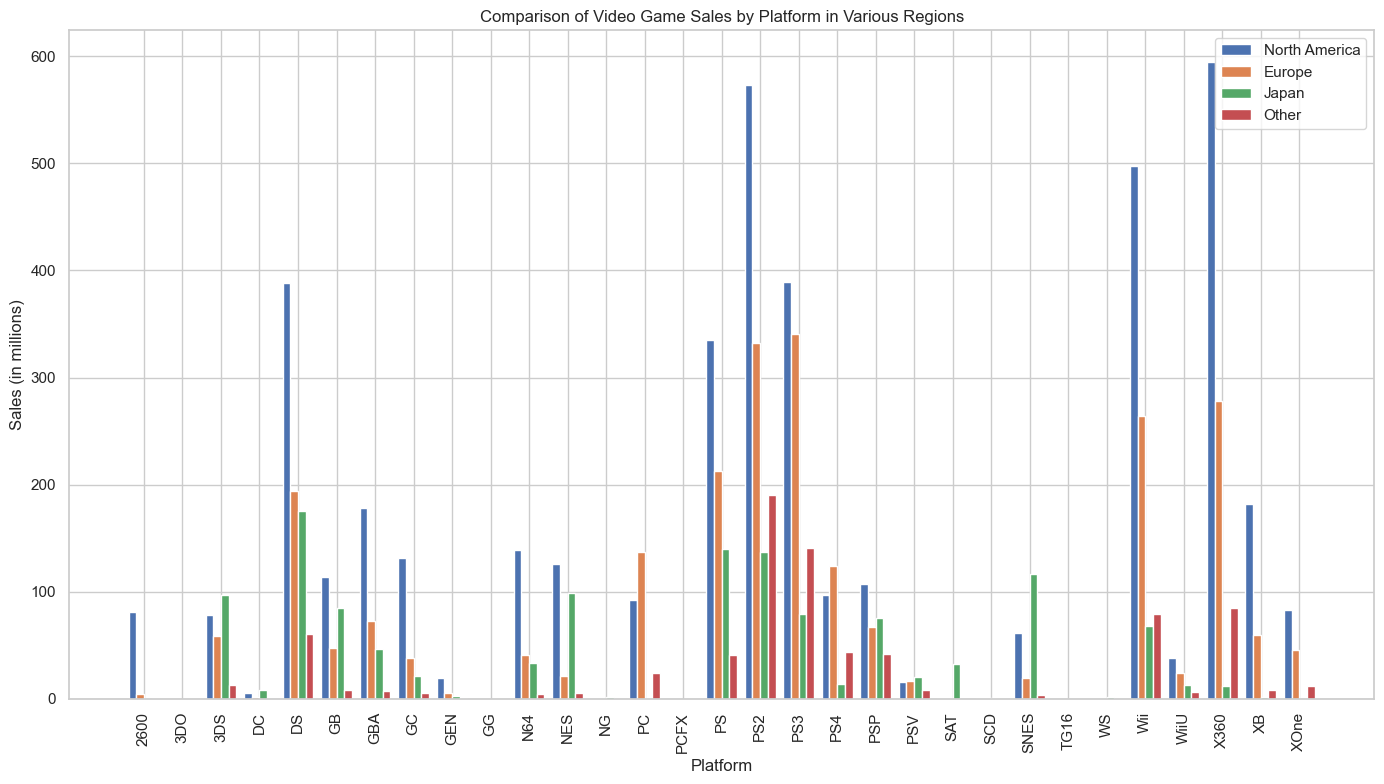

In [127]:
fig, ax = plt.subplots(figsize=(14, 8))
index = np.arange(len(platform_sales_comparison['Platform']))
bar_width = 0.2 

rects1 = ax.bar(index - 1.5 * bar_width, platform_sales_comparison['NA_Sales'], bar_width, label='North America')
rects2 = ax.bar(index - 0.5 * bar_width, platform_sales_comparison['EU_Sales'], bar_width, label='Europe')
rects3 = ax.bar(index + 0.5 * bar_width, platform_sales_comparison['JP_Sales'], bar_width, label='Japan')
rects4 = ax.bar(index + 1.5 * bar_width, platform_sales_comparison['Other_Sales'], bar_width, label='Other')

ax.set_xlabel('Platform')
ax.set_ylabel('Sales (in millions)')
ax.set_title('Comparison of Video Game Sales by Platform in Various Regions')
ax.set_xticks(index)
ax.set_xticklabels(platform_sales_comparison['Platform'], rotation=90)

ax.legend()

plt.tight_layout() 
plt.show()


# Comparision by Genre

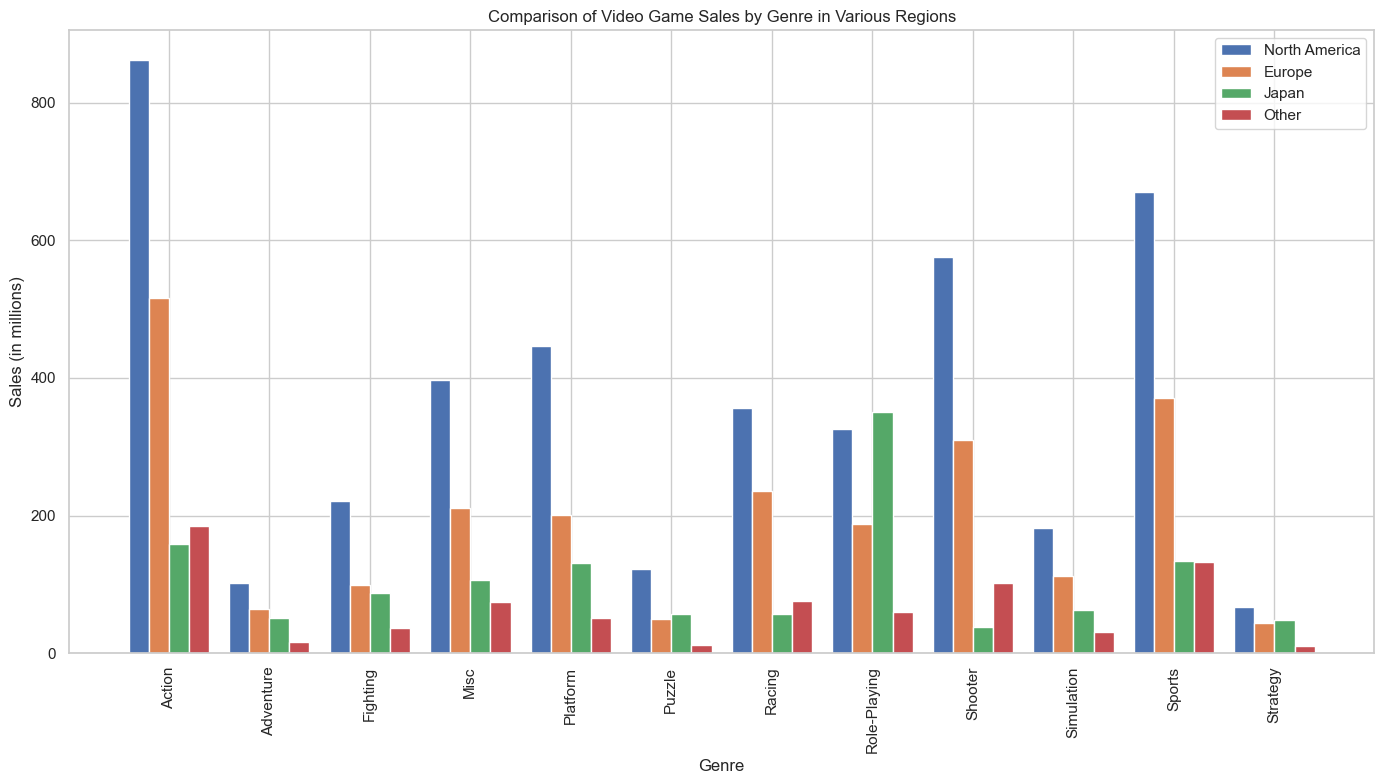

In [128]:
genre_sales_comparison = original_df.groupby('Genre').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum'
}).reset_index()

fig, ax = plt.subplots(figsize=(14, 8))
index = np.arange(len(genre_sales_comparison['Genre']))
bar_width = 0.2 

rects1 = ax.bar(index - 1.5 * bar_width, genre_sales_comparison['NA_Sales'], bar_width, label='North America')
rects2 = ax.bar(index - 0.5 * bar_width, genre_sales_comparison['EU_Sales'], bar_width, label='Europe')
rects3 = ax.bar(index + 0.5 * bar_width, genre_sales_comparison['JP_Sales'], bar_width, label='Japan')
rects4 = ax.bar(index + 1.5 * bar_width, genre_sales_comparison['Other_Sales'], bar_width, label='Other')

ax.set_xlabel('Genre')
ax.set_ylabel('Sales (in millions)')
ax.set_title('Comparison of Video Game Sales by Genre in Various Regions')
ax.set_xticks(index)  
ax.set_xticklabels(genre_sales_comparison['Genre'], rotation=90)  

ax.legend()  

plt.tight_layout()  
plt.show()


# Comparision by Year

In [129]:
yearly_sales_comparison = original_df.groupby('Year').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum'
}).reset_index()

fig = px.line(yearly_sales_comparison, x='Year', y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
              labels={'value': 'Sales (in millions)', 'variable': 'Region'},
              title='Yearly Video Game Sales by Region')

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Sales (in millions)',
    legend_title='Region',
    hovermode='x',
    width=1050,
    height=600
)

fig.update_traces(mode='lines+markers')

fig.show()